<a href="https://colab.research.google.com/github/masonnystrom/DS-Unit-1-Sprint-1-Data-Wrangling-and-Storytelling/blob/master/Mason_LS_DS_112_Make_Features_Assignment.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

<img align="left" src="https://lever-client-logos.s3.amazonaws.com/864372b1-534c-480e-acd5-9711f850815c-1524247202159.png" width=200> 

# Assignment:

- Replicate the lesson code.

 - This means that if you haven't followed along already, type out the things that we did in class. Forcing your fingers to hit each key will help you internalize the syntax of what we're doing. Make sure you understand each line of code that you're writing, google things that you don't fully understand.
 - [Lambda Learning Method for DS - By Ryan Herr](https://docs.google.com/document/d/1ubOw9B3Hfip27hF2ZFnW3a3z9xAgrUDRReOEo-FHCVs/edit?usp=sharing)
- Convert the `term` column from string to integer.
- Make a column named `loan_status_is_great`. It should contain the integer 1 if `loan_status` is "Current" or "Fully Paid." Else it should contain the integer 0.
- Make `last_pymnt_d_month` and `last_pymnt_d_year` columns.

In [0]:
##### Begin Working Here #####
import pandas as pd

In [0]:
# LendingClub Data Set for Q4 of 2018

! wget https://resources.lendingclub.com/LoanStats_2018Q4.csv.zip

--2020-01-20 03:06:04--  https://resources.lendingclub.com/LoanStats_2018Q4.csv.zip
Resolving resources.lendingclub.com (resources.lendingclub.com)... 64.48.1.20
Connecting to resources.lendingclub.com (resources.lendingclub.com)|64.48.1.20|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: unspecified [application/zip]
Saving to: ‘LoanStats_2018Q4.csv.zip’

LoanStats_2018Q4.cs     [                <=> ]  21.72M   410KB/s    in 56s     

2020-01-20 03:07:06 (400 KB/s) - ‘LoanStats_2018Q4.csv.zip’ saved [22776791]



In [0]:
! unzip LoanStats_2018Q4.csv.zip

Archive:  LoanStats_2018Q4.csv.zip
replace LoanStats_2018Q4.csv? [y]es, [n]o, [A]ll, [N]one, [r]ename: 

In [0]:
# Read into CSV
loan_data = pd.read_csv('LoanStats_2018Q4.csv', header=1, skipfooter=2)
loan_data.shape

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:1: ParserWarning: Falling back to the 'python' engine because the 'c' engine does not support skipfooter; you can avoid this warning by specifying engine='python'.
  """Entry point for launching an IPython kernel.


(128397, 144)

In [0]:
loan_data.head()

,id,member_id,loan_amnt,funded_amnt,funded_amnt_inv,term,int_rate,installment,grade,sub_grade,emp_title,emp_length,home_ownership,annual_inc,verification_status,issue_d,loan_status,pymnt_plan,url,desc,purpose,title,zip_code,addr_state,dti,delinq_2yrs,earliest_cr_line,inq_last_6mths,mths_since_last_delinq,mths_since_last_record,open_acc,pub_rec,revol_bal,revol_util,total_acc,initial_list_status,out_prncp,out_prncp_inv,total_pymnt,total_pymnt_inv,...,percent_bc_gt_75,pub_rec_bankruptcies,tax_liens,tot_hi_cred_lim,total_bal_ex_mort,total_bc_limit,total_il_high_credit_limit,revol_bal_joint,sec_app_earliest_cr_line,sec_app_inq_last_6mths,sec_app_mort_acc,sec_app_open_acc,sec_app_revol_util,sec_app_open_act_il,sec_app_num_rev_accts,sec_app_chargeoff_within_12_mths,sec_app_collections_12_mths_ex_med,sec_app_mths_since_last_major_derog,hardship_flag,hardship_type,hardship_reason,hardship_status,deferral_term,hardship_amount,hardship_start_date,hardship_end_date,payment_plan_start_date,hardship_length,hardship_dpd,hardship_loan_status,orig_projected_additional_accrued_interest,hardship_payoff_balance_amount,hardship_last_payment_amount,debt_settlement_flag,debt_settlement_flag_date,settlement_status,settlement_date,settlement_amount,settlement_percentage,settlement_term
0,NaN,NaN,6000,6000,6000.0,36 months,14.47%,206.44,C,C2,Manager,10+ years,RENT,55000.0,Verified,Dec-2018,Charged Off,n,NaN,NaN,credit_card,Credit card refinancing,104xx,NY,10.65,0,Jun-2006,0,NaN,NaN,6,0,4196,91.2%,8,w,0.00,0.00,1106.520000,1106.52,...,100.0,0,0,15800,12514,4300,11200,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,N,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Y,Oct-2019,ACTIVE,Oct-2019,3479.0,60.01,24.0
1,NaN,NaN,24000,24000,24000.0,36 months,10.33%,778.14,B,B1,Maintenance Manager,10+ years,MORTGAGE,100000.0,Not Verified,Dec-2018,Current,n,NaN,NaN,debt_consolidation,Debt consolidation,606xx,IL,19.14,0,Oct-1996,3,39.0,NaN,14,0,8547,27.7%,28,w,16807.30,16807.30,9317.020000,9317.02,...,16.7,0,0,335121,50686,25900,61514,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,N,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,N,NaN,NaN,NaN,NaN,NaN,NaN
2,NaN,NaN,30000,30000,30000.0,36 months,15.02%,1040.26,C,C3,Firefighter,10+ years,RENT,90000.0,Verified,Dec-2018,Fully Paid,n,NaN,NaN,debt_consolidation,Debt consolidation,681xx,NE,22.23,0,May-2007,1,NaN,NaN,8,0,25754,48%,23,w,0.00,0.00,30883.673712,30883.67,...,50.0,0,0,89849,51370,41600,36249,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,N,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,N,NaN,NaN,NaN,NaN,NaN,NaN
3,NaN,NaN,8000,8000,8000.0,36 months,12.98%,269.48,B,B5,Controller,4 years,MORTGAGE,95000.0,Source Verified,Dec-2018,Current,n,NaN,NaN,credit_card,Credit card refinancing,480xx,MI,9.44,0,Mar-2009,2,73.0,NaN,7,0,11434,33.3%,20,w,1707.34,1707.34,6855.630000,6855.63,...,20.0,0,0,271550,25150,34300,14000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,N,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,N,NaN,NaN,NaN,NaN,NaN,NaN
4,NaN,NaN,22400,22400,22400.0,60 months,16.14%,546.40,C,C4,Paramedic/ Fire Fighter,10+ years,OWN,56000.0,Source Verified,Dec-2018,Current,n,NaN,NaN,credit_card,Credit card refinancing,234xx,VA,18.47,0,Dec-2004,0,75.0,NaN,15,0,13555,38.2%,22,w,19230.91,19230.91,6526.670000,6526.67,...,25.0,0,0,253539,32070,28200,23364,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,N,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,N,NaN,NaN,NaN,NaN,NaN,NaN


In [0]:
loan_data.dtypes

id                       float64
member_id                float64
loan_amnt                  int64
funded_amnt                int64
funded_amnt_inv          float64
                          ...   
settlement_status         object
settlement_date           object
settlement_amount        float64
settlement_percentage    float64
settlement_term          float64
Length: 144, dtype: object

In [0]:
loan_data['term'].head()

0     36 months
1     36 months
2     36 months
3     36 months
4     60 months
Name: term, dtype: object

In [0]:
loan_data['term'][4]
# Preceding space and string

' 60 months'

In [0]:
# clean the data, find the NaN values
pd.set_option('display.max_rows', 200)
loan_data.isnull().sum().sort_values(ascending=False)

id                                            128397
desc                                          128397
member_id                                     128397
url                                           128397
orig_projected_additional_accrued_interest    128191
hardship_type                                 128164
hardship_last_payment_amount                  128164
hardship_payoff_balance_amount                128164
hardship_reason                               128164
hardship_loan_status                          128164
hardship_dpd                                  128164
hardship_length                               128164
payment_plan_start_date                       128164
hardship_end_date                             128164
hardship_start_date                           128164
hardship_amount                               128164
deferral_term                                 128164
hardship_status                               128164
settlement_percentage                         

In [0]:
# address the extra Nans in each column by skipping the footer  and dropping some columns
loan_data_cleaned = loan_data.drop(['id', 'desc', 'member_id', 'url'], axis=1)

In [0]:
loan_data_cleaned.isnull().sum().sort_values(ascending=False)

orig_projected_additional_accrued_interest    128191
hardship_loan_status                          128164
hardship_dpd                                  128164
hardship_reason                               128164
hardship_status                               128164
deferral_term                                 128164
hardship_amount                               128164
hardship_start_date                           128164
hardship_end_date                             128164
payment_plan_start_date                       128164
hardship_length                               128164
hardship_type                                 128164
hardship_payoff_balance_amount                128164
hardship_last_payment_amount                  128164
settlement_percentage                         127946
debt_settlement_flag_date                     127946
settlement_status                             127946
settlement_date                               127946
settlement_amount                             

#Term

In [0]:
# Clean up the term column
loan_data_cleaned['term'].head(10)

0     36 months
1     36 months
2     36 months
3     36 months
4     60 months
5     36 months
6     60 months
7     36 months
8     36 months
9     60 months
Name: term, dtype: object

In [0]:
type(loan_data_cleaned['term'][4])

str

In [0]:
term.strip()

'36 months'

In [0]:
term.strip(' months')


'36'

In [0]:
#remove both with one
term.strip().strip(' months')

'36'

In [0]:
# convert to float
float('36')

36.0

In [0]:
float(term.strip().strip(' months'))

36.0

In [0]:
type(float(term.strip().strip(' months')))

float

In [0]:
# Function converts strings to integers
def make_integer(cell_contents):
  return(float(cell_contents.strip().strip(' months')))


In [0]:
make_integer(term)

36.0

In [0]:
# check that it worked
type(make_integer(term))

float

In [0]:
# Apply make_integer function to the entire columnn
new_list = []


In [0]:
# create for loop
for cell in loan_data_cleaned['term']:
  new_list.append(make_integer(cell))

In [0]:
new_list[:10]
# Had to define term for the initial checks and then remove it to make this cell run correctly

[36.0, 36.0, 36.0, 36.0, 60.0, 36.0, 60.0, 36.0, 36.0, 60.0]

In [0]:
loan_data_cleaned['term_cleaned'] = pd.Series(new_list)
loan_data_cleaned.head(7)

,loan_amnt,funded_amnt,funded_amnt_inv,term,int_rate,installment,grade,sub_grade,emp_title,emp_length,home_ownership,annual_inc,verification_status,issue_d,loan_status,pymnt_plan,purpose,title,zip_code,addr_state,dti,delinq_2yrs,earliest_cr_line,inq_last_6mths,mths_since_last_delinq,mths_since_last_record,open_acc,pub_rec,revol_bal,revol_util,total_acc,initial_list_status,out_prncp,out_prncp_inv,total_pymnt,total_pymnt_inv,total_rec_prncp,total_rec_int,total_rec_late_fee,recoveries,...,pub_rec_bankruptcies,tax_liens,tot_hi_cred_lim,total_bal_ex_mort,total_bc_limit,total_il_high_credit_limit,revol_bal_joint,sec_app_earliest_cr_line,sec_app_inq_last_6mths,sec_app_mort_acc,sec_app_open_acc,sec_app_revol_util,sec_app_open_act_il,sec_app_num_rev_accts,sec_app_chargeoff_within_12_mths,sec_app_collections_12_mths_ex_med,sec_app_mths_since_last_major_derog,hardship_flag,hardship_type,hardship_reason,hardship_status,deferral_term,hardship_amount,hardship_start_date,hardship_end_date,payment_plan_start_date,hardship_length,hardship_dpd,hardship_loan_status,orig_projected_additional_accrued_interest,hardship_payoff_balance_amount,hardship_last_payment_amount,debt_settlement_flag,debt_settlement_flag_date,settlement_status,settlement_date,settlement_amount,settlement_percentage,settlement_term,term_cleaned
0,6000,6000,6000.0,36 months,14.47%,206.44,C,C2,Manager,10+ years,RENT,55000.0,Verified,Dec-2018,Charged Off,n,credit_card,Credit card refinancing,104xx,NY,10.65,0,Jun-2006,0,NaN,NaN,6,0,4196,91.2%,8,w,0.00,0.00,1106.520000,1106.52,546.14,272.38,0.0,288.0,...,0,0,15800,12514,4300,11200,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,N,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Y,Oct-2019,ACTIVE,Oct-2019,3479.0,60.01,24.0,36.0
1,24000,24000,24000.0,36 months,10.33%,778.14,B,B1,Maintenance Manager,10+ years,MORTGAGE,100000.0,Not Verified,Dec-2018,Current,n,debt_consolidation,Debt consolidation,606xx,IL,19.14,0,Oct-1996,3,39.0,NaN,14,0,8547,27.7%,28,w,16807.30,16807.30,9317.020000,9317.02,7192.70,2124.32,0.0,0.0,...,0,0,335121,50686,25900,61514,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,N,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,N,NaN,NaN,NaN,NaN,NaN,NaN,36.0
2,30000,30000,30000.0,36 months,15.02%,1040.26,C,C3,Firefighter,10+ years,RENT,90000.0,Verified,Dec-2018,Fully Paid,n,debt_consolidation,Debt consolidation,681xx,NE,22.23,0,May-2007,1,NaN,NaN,8,0,25754,48%,23,w,0.00,0.00,30883.673712,30883.67,30000.00,883.67,0.0,0.0,...,0,0,89849,51370,41600,36249,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,N,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,N,NaN,NaN,NaN,NaN,NaN,NaN,36.0
3,8000,8000,8000.0,36 months,12.98%,269.48,B,B5,Controller,4 years,MORTGAGE,95000.0,Source Verified,Dec-2018,Current,n,credit_card,Credit card refinancing,480xx,MI,9.44,0,Mar-2009,2,73.0,NaN,7,0,11434,33.3%,20,w,1707.34,1707.34,6855.630000,6855.63,6292.66,562.97,0.0,0.0,...,0,0,271550,25150,34300,14000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,N,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,N,NaN,NaN,NaN,NaN,NaN,NaN,36.0
4,22400,22400,22400.0,60 months,16.14%,546.40,C,C4,Paramedic/ Fire Fighter,10+ years,OWN,56000.0,Source Verified,Dec-2018,Current,n,credit_card,Credit card refinancing,234xx,VA,18.47,0,Dec-2004,0,75.0,NaN,15,0,13555,38.2%,22,w,19230.91,19230.91,6526.670000,6526.67,3169.09,3357.58,0.0,0.0,...,0,0,253539,32070,28200,23364,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,N,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,N,NaN,NaN,NaN,NaN,NaN,NaN,60.0
5,5000,5000,5000.0,36 months,12.98%,168.43,B,B5,Consultant,2 years,RENT,80000.0,Not Verified,Dec-2018,Current,n,debt_consolidation,Debt consolidation,100xx,NY,2.39,0,Jan-2014,1,NaN,NaN,8,0,7356,9.4%,9,w,3543.19,3543.19,2015.750000,2015.75,1456.81,558.94,0.0,0.0,...,0,0,78200,7356,78200,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,N,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,N,NaN,NaN,NaN,NaN,NaN,NaN,36.0
6,27000,27000,27000.0,60 months,15.02%,642.6

In [0]:
loan_data_cleaned.dtypes

loan_amnt                                       int64
funded_amnt                                     int64
funded_amnt_inv                               float64
term                                           object
int_rate                                       object
installment                                   float64
grade                                          object
sub_grade                                      object
emp_title                                      object
emp_length                                     object
home_ownership                                 object
annual_inc                                    float64
verification_status                            object
issue_d                                        object
loan_status                                    object
pymnt_plan                                     object
purpose                                        object
title                                          object
zip_code                    

In [0]:
loan_data_cleaned['term_cleaned_actual'] = loan_data_cleaned['term'].apply(make_integer)
loan_data_cleaned.head()

,loan_amnt,funded_amnt,funded_amnt_inv,term,int_rate,installment,grade,sub_grade,emp_title,emp_length,home_ownership,annual_inc,verification_status,issue_d,loan_status,pymnt_plan,purpose,title,zip_code,addr_state,dti,delinq_2yrs,earliest_cr_line,inq_last_6mths,mths_since_last_delinq,mths_since_last_record,open_acc,pub_rec,revol_bal,revol_util,total_acc,initial_list_status,out_prncp,out_prncp_inv,total_pymnt,total_pymnt_inv,total_rec_prncp,total_rec_int,total_rec_late_fee,recoveries,...,tax_liens,tot_hi_cred_lim,total_bal_ex_mort,total_bc_limit,total_il_high_credit_limit,revol_bal_joint,sec_app_earliest_cr_line,sec_app_inq_last_6mths,sec_app_mort_acc,sec_app_open_acc,sec_app_revol_util,sec_app_open_act_il,sec_app_num_rev_accts,sec_app_chargeoff_within_12_mths,sec_app_collections_12_mths_ex_med,sec_app_mths_since_last_major_derog,hardship_flag,hardship_type,hardship_reason,hardship_status,deferral_term,hardship_amount,hardship_start_date,hardship_end_date,payment_plan_start_date,hardship_length,hardship_dpd,hardship_loan_status,orig_projected_additional_accrued_interest,hardship_payoff_balance_amount,hardship_last_payment_amount,debt_settlement_flag,debt_settlement_flag_date,settlement_status,settlement_date,settlement_amount,settlement_percentage,settlement_term,term_cleaned,term_cleaned_actual
0,6000,6000,6000.0,36 months,14.47%,206.44,C,C2,Manager,10+ years,RENT,55000.0,Verified,Dec-2018,Charged Off,n,credit_card,Credit card refinancing,104xx,NY,10.65,0,Jun-2006,0,NaN,NaN,6,0,4196,91.2%,8,w,0.00,0.00,1106.520000,1106.52,546.14,272.38,0.0,288.0,...,0,15800,12514,4300,11200,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,N,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Y,Oct-2019,ACTIVE,Oct-2019,3479.0,60.01,24.0,36.0,36.0
1,24000,24000,24000.0,36 months,10.33%,778.14,B,B1,Maintenance Manager,10+ years,MORTGAGE,100000.0,Not Verified,Dec-2018,Current,n,debt_consolidation,Debt consolidation,606xx,IL,19.14,0,Oct-1996,3,39.0,NaN,14,0,8547,27.7%,28,w,16807.30,16807.30,9317.020000,9317.02,7192.70,2124.32,0.0,0.0,...,0,335121,50686,25900,61514,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,N,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,N,NaN,NaN,NaN,NaN,NaN,NaN,36.0,36.0
2,30000,30000,30000.0,36 months,15.02%,1040.26,C,C3,Firefighter,10+ years,RENT,90000.0,Verified,Dec-2018,Fully Paid,n,debt_consolidation,Debt consolidation,681xx,NE,22.23,0,May-2007,1,NaN,NaN,8,0,25754,48%,23,w,0.00,0.00,30883.673712,30883.67,30000.00,883.67,0.0,0.0,...,0,89849,51370,41600,36249,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,N,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,N,NaN,NaN,NaN,NaN,NaN,NaN,36.0,36.0
3,8000,8000,8000.0,36 months,12.98%,269.48,B,B5,Controller,4 years,MORTGAGE,95000.0,Source Verified,Dec-2018,Current,n,credit_card,Credit card refinancing,480xx,MI,9.44,0,Mar-2009,2,73.0,NaN,7,0,11434,33.3%,20,w,1707.34,1707.34,6855.630000,6855.63,6292.66,562.97,0.0,0.0,...,0,271550,25150,34300,14000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,N,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,N,NaN,NaN,NaN,NaN,NaN,NaN,36.0,36.0
4,22400,22400,22400.0,60 months,16.14%,546.40,C,C4,Paramedic/ Fire Fighter,10+ years,OWN,56000.0,Source Verified,Dec-2018,Current,n,credit_card,Credit card refinancing,234xx,VA,18.47,0,Dec-2004,0,75.0,NaN,15,0,13555,38.2%,22,w,19230.91,19230.91,6526.670000,6526.67,3169.09,3357.58,0.0,0.0,...,0,253539,32070,28200,23364,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,N,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,N,NaN,NaN,NaN,NaN,NaN,NaN,60.0,60.0


#Make a column named loan_status_is_great. It should contain the integer 1 if loan_status is "Current" or "Fully Paid." Else it should contain the integer 0.

In [0]:
loan_data_cleaned['loan_status'].head(10)

0    Charged Off
1        Current
2     Fully Paid
3        Current
4        Current
5        Current
6        Current
7        Current
8        Current
9        Current
Name: loan_status, dtype: object

In [0]:
loan_data_cleaned['loan_status'].isnull().sum()
# Data looking Clean

0

In [0]:
# test on examples
examples = ['Current', 'Fully Paid', 'Charged Off', 'something']

In [0]:
# Fuction for loan_status_is_great to measure loans that are 'current' or 'fully paid 
# with a 1, everything else 0 

def loan_status_function(status):
  if status == 'Fully Paid':
    return 1
  if status == 'Current':
    return 1
  else:
    return 0



In [0]:
# for loop
for status in examples:
  print(loan_status_function(status))

1
1
0
0


In [0]:
loan_data_cleaned['loan_status_is_great'] = loan_data_cleaned['loan_status'].apply(loan_status_function)
loan_data_cleaned.head()

,loan_amnt,funded_amnt,funded_amnt_inv,term,int_rate,installment,grade,sub_grade,emp_title,emp_length,home_ownership,annual_inc,verification_status,issue_d,loan_status,pymnt_plan,purpose,title,zip_code,addr_state,dti,delinq_2yrs,earliest_cr_line,inq_last_6mths,mths_since_last_delinq,mths_since_last_record,open_acc,pub_rec,revol_bal,revol_util,total_acc,initial_list_status,out_prncp,out_prncp_inv,total_pymnt,total_pymnt_inv,total_rec_prncp,total_rec_int,total_rec_late_fee,recoveries,...,tot_hi_cred_lim,total_bal_ex_mort,total_bc_limit,total_il_high_credit_limit,revol_bal_joint,sec_app_earliest_cr_line,sec_app_inq_last_6mths,sec_app_mort_acc,sec_app_open_acc,sec_app_revol_util,sec_app_open_act_il,sec_app_num_rev_accts,sec_app_chargeoff_within_12_mths,sec_app_collections_12_mths_ex_med,sec_app_mths_since_last_major_derog,hardship_flag,hardship_type,hardship_reason,hardship_status,deferral_term,hardship_amount,hardship_start_date,hardship_end_date,payment_plan_start_date,hardship_length,hardship_dpd,hardship_loan_status,orig_projected_additional_accrued_interest,hardship_payoff_balance_amount,hardship_last_payment_amount,debt_settlement_flag,debt_settlement_flag_date,settlement_status,settlement_date,settlement_amount,settlement_percentage,settlement_term,term_cleaned,term_cleaned_actual,loan_status_is_great
0,6000,6000,6000.0,36 months,14.47%,206.44,C,C2,Manager,10+ years,RENT,55000.0,Verified,Dec-2018,Charged Off,n,credit_card,Credit card refinancing,104xx,NY,10.65,0,Jun-2006,0,NaN,NaN,6,0,4196,91.2%,8,w,0.00,0.00,1106.520000,1106.52,546.14,272.38,0.0,288.0,...,15800,12514,4300,11200,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,N,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Y,Oct-2019,ACTIVE,Oct-2019,3479.0,60.01,24.0,36.0,36.0,0
1,24000,24000,24000.0,36 months,10.33%,778.14,B,B1,Maintenance Manager,10+ years,MORTGAGE,100000.0,Not Verified,Dec-2018,Current,n,debt_consolidation,Debt consolidation,606xx,IL,19.14,0,Oct-1996,3,39.0,NaN,14,0,8547,27.7%,28,w,16807.30,16807.30,9317.020000,9317.02,7192.70,2124.32,0.0,0.0,...,335121,50686,25900,61514,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,N,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,N,NaN,NaN,NaN,NaN,NaN,NaN,36.0,36.0,1
2,30000,30000,30000.0,36 months,15.02%,1040.26,C,C3,Firefighter,10+ years,RENT,90000.0,Verified,Dec-2018,Fully Paid,n,debt_consolidation,Debt consolidation,681xx,NE,22.23,0,May-2007,1,NaN,NaN,8,0,25754,48%,23,w,0.00,0.00,30883.673712,30883.67,30000.00,883.67,0.0,0.0,...,89849,51370,41600,36249,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,N,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,N,NaN,NaN,NaN,NaN,NaN,NaN,36.0,36.0,1
3,8000,8000,8000.0,36 months,12.98%,269.48,B,B5,Controller,4 years,MORTGAGE,95000.0,Source Verified,Dec-2018,Current,n,credit_card,Credit card refinancing,480xx,MI,9.44,0,Mar-2009,2,73.0,NaN,7,0,11434,33.3%,20,w,1707.34,1707.34,6855.630000,6855.63,6292.66,562.97,0.0,0.0,...,271550,25150,34300,14000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,N,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,N,NaN,NaN,NaN,NaN,NaN,NaN,36.0,36.0,1
4,22400,22400,22400.0,60 months,16.14%,546.40,C,C4,Paramedic/ Fire Fighter,10+ years,OWN,56000.0,Source Verified,Dec-2018,Current,n,credit_card,Credit card refinancing,234xx,VA,18.47,0,Dec-2004,0,75.0,NaN,15,0,13555,38.2%,22,w,19230.91,19230.91,6526.670000,6526.67,3169.09,3357.58,0.0,0.0,...,253539,32070,28200,23364,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,N,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,N,NaN,NaN,NaN,NaN,NaN,NaN,60.0,60.0,1


#Make last_pymnt_d_month and last_pymnt_d_year columns.


In [0]:
loan_data_cleaned

,issue_d,last_pymnt_d,next_pymnt_d,last_credit_pull_d
0,Dec-2018,2019-04-01,NaN,Nov-2019
1,Dec-2018,2019-12-01,Jan-2020,Nov-2019
2,Dec-2018,2019-02-01,NaN,Nov-2019
3,Dec-2018,2019-12-01,Jan-2020,Dec-2019
4,Dec-2018,2019-12-01,Jan-2020,Nov-2019


In [0]:
#Find date columns
for columns in loan_data_cleaned:
  if columns.endswith('_d'):
    print(columns)

issue_d
last_pymnt_d
next_pymnt_d
last_credit_pull_d


In [0]:
loan_data_cleaned['last_pymnt_d'].head()

0    Apr-2019
1    Dec-2019
2    Feb-2019
3    Dec-2019
4    Dec-2019
Name: last_pymnt_d, dtype: object

In [0]:
loan_data_cleaned['last_pymnt_d'][:10]

0    Apr-2019
1    Dec-2019
2    Feb-2019
3    Dec-2019
4    Dec-2019
5    Dec-2019
6    Dec-2019
7    Dec-2019
8    Dec-2019
9    Dec-2019
Name: last_pymnt_d, dtype: object

Because this string format month-year is a common date format, we can just let pandas detect this format and translate it to the appropriate datetime object. 

In [0]:
# as a list comprehension 
date_columns = [columns for columns in loan_data_cleaned if columns.endswith('_d')]

In [0]:
# infer_datetime_format = True
loan_data_cleaned['last_pymnt_d'] = pd.to_datetime(loan_data_cleaned['last_pymnt_d'], infer_datetime_format=True)

In [0]:
loan_data_cleaned[date_columns].head()

,issue_d,last_pymnt_d,next_pymnt_d,last_credit_pull_d
0,Dec-2018,2019-04-01,NaN,Nov-2019
1,Dec-2018,2019-12-01,Jan-2020,Nov-2019
2,Dec-2018,2019-02-01,NaN,Nov-2019
3,Dec-2018,2019-12-01,Jan-2020,Dec-2019
4,Dec-2018,2019-12-01,Jan-2020,Nov-2019


In [0]:
# now we can see that the issued_d column has changed to hold datetime objects. 
# Next we can look at the cells specifically to see what datetime object looks like
loan_data_cleaned['last_pymnt_d'].iloc[11]

Timestamp('2019-12-01 00:00:00')

In [0]:
loan_data_cleaned[date_columns]['last_pymnt_d'].head().values

array(['2019-04-01T00:00:00.000000000', '2019-12-01T00:00:00.000000000',
       '2019-02-01T00:00:00.000000000', '2019-12-01T00:00:00.000000000',
       '2019-12-01T00:00:00.000000000'], dtype='datetime64[ns]')

In [0]:
loan_data_cleaned=loan_data_cleaned[date_columns].copy()
loan_data_cleaned[date_columns]['last_pymnt_d_year'] = loan_data_cleaned[date_columns]['last_pymnt_d'].dt.year
loan_data_cleaned[date_columns].head()

,issue_d,last_pymnt_d,next_pymnt_d,last_credit_pull_d
0,Dec-2018,2019-04-01,NaN,Nov-2019
1,Dec-2018,2019-12-01,Jan-2020,Nov-2019
2,Dec-2018,2019-02-01,NaN,Nov-2019
3,Dec-2018,2019-12-01,Jan-2020,Dec-2019
4,Dec-2018,2019-12-01,Jan-2020,Nov-2019


In [0]:
loan_data_cleaned[date_columns]['last_pymnt_d_month'] = loan_data_cleaned[date_columns]['last_pymnt_d'].dt.month 
loan_data_cleaned[date_columns].head()

,issue_d,last_pymnt_d,next_pymnt_d,last_credit_pull_d
0,Dec-2018,2019-04-01,NaN,Nov-2019
1,Dec-2018,2019-12-01,Jan-2020,Nov-2019
2,Dec-2018,2019-02-01,NaN,Nov-2019
3,Dec-2018,2019-12-01,Jan-2020,Dec-2019
4,Dec-2018,2019-12-01,Jan-2020,Nov-2019


In [0]:
loan_data_cleaned.head()

,issue_d,last_pymnt_d,next_pymnt_d,last_credit_pull_d
0,Dec-2018,2019-04-01,NaN,Nov-2019
1,Dec-2018,2019-12-01,Jan-2020,Nov-2019
2,Dec-2018,2019-02-01,NaN,Nov-2019
3,Dec-2018,2019-12-01,Jan-2020,Dec-2019
4,Dec-2018,2019-12-01,Jan-2020,Nov-2019


# Stretch Goals

You can do more with the LendingClub or Instacart datasets.

LendingClub options:
- There's one other column in the dataframe with percent signs. Remove them and convert to floats. You'll need to handle missing values.
- Modify the `emp_title` column to replace titles with 'Other' if the title is not in the top 20. 
- Take initiatve and work on your own ideas!

Instacart options:
- Read [Instacart Market Basket Analysis, Winner's Interview: 2nd place, Kazuki Onodera](http://blog.kaggle.com/2017/09/21/instacart-market-basket-analysis-winners-interview-2nd-place-kazuki-onodera/), especially the **Feature Engineering** section. (Can you choose one feature from his bulleted lists, and try to engineer it with pandas code?)
- Read and replicate parts of [Simple Exploration Notebook - Instacart](https://www.kaggle.com/sudalairajkumar/simple-exploration-notebook-instacart). (It's the Python Notebook with the most upvotes for this Kaggle competition.)
- Take initiative and work on your own ideas!

You can uncomment and run the cells below to re-download and extract the Instacart data

#Instacart

In [0]:
# !wget https://s3.amazonaws.com/instacart-datasets/instacart_online_grocery_shopping_2017_05_01.tar.gz

In [0]:
! wget https://s3.amazonaws.com/instacart-datasets/instacart_online_grocery_shopping_2017_05_01.tar.gz

--2020-01-20 03:17:58--  https://s3.amazonaws.com/instacart-datasets/instacart_online_grocery_shopping_2017_05_01.tar.gz
Resolving s3.amazonaws.com (s3.amazonaws.com)... 52.216.179.197
Connecting to s3.amazonaws.com (s3.amazonaws.com)|52.216.179.197|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 205548478 (196M) [application/x-gzip]
Saving to: ‘instacart_online_grocery_shopping_2017_05_01.tar.gz’

instacart_online_gr 100%[===================>] 196.03M  16.9MB/s    in 13s     

2020-01-20 03:18:12 (15.0 MB/s) - ‘instacart_online_grocery_shopping_2017_05_01.tar.gz’ saved [205548478/205548478]



In [0]:
!tar --gunzip --extract --verbose --file=instacart_online_grocery_shopping_2017_05_01.tar.gz

instacart_2017_05_01/
instacart_2017_05_01/._aisles.csv
instacart_2017_05_01/aisles.csv
instacart_2017_05_01/._departments.csv
instacart_2017_05_01/departments.csv
instacart_2017_05_01/._order_products__prior.csv
instacart_2017_05_01/order_products__prior.csv
instacart_2017_05_01/._order_products__train.csv
instacart_2017_05_01/order_products__train.csv
instacart_2017_05_01/._orders.csv
instacart_2017_05_01/orders.csv
instacart_2017_05_01/._products.csv
instacart_2017_05_01/products.csv


In [0]:
%cd instacart_2017_05_01

/content/instacart_2017_05_01


In [0]:
# import modules
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
color = sns.color_palette()

%matplotlib inline 

pd.options.mode.chained_assignment = None # default='warn'

In [0]:
aisles_df = pd.read_csv('aisles.csv')
departments_df = pd.read_csv('departments.csv')
order_products_prior_df = pd.read_csv('order_products__prior.csv')
order_products_train_df = pd.read_csv('order_products__train.csv')
orders_df = pd.read_csv('orders.csv')
products_df = pd.read_csv('products.csv')


In [0]:
aisles_df.head()
order_df.head()

,order_id,user_id,eval_set,order_number,order_dow,order_hour_of_day,days_since_prior_order
0,2539329,1,prior,1,2,8,NaN
1,2398795,1,prior,2,3,7,15.0
2,473747,1,prior,3,3,12,21.0
3,2254736,1,prior,4,4,7,29.0
4,431534,1,prior,5,4,15,28.0


In [0]:
departments_df.head()

,department_id,department
0,1,frozen
1,2,other
2,3,bakery
3,4,produce
4,5,alcohol


In [0]:
order_products_prior_df.head()

,order_id,product_id,add_to_cart_order,reordered
0,2,33120,1,1
1,2,28985,2,1
2,2,9327,3,0
3,2,45918,4,1
4,2,30035,5,0


In [0]:
order_products_train_df.head()

,order_id,product_id,add_to_cart_order,reordered
0,1,49302,1,1
1,1,11109,2,1
2,1,10246,3,0
3,1,49683,4,0
4,1,43633,5,1


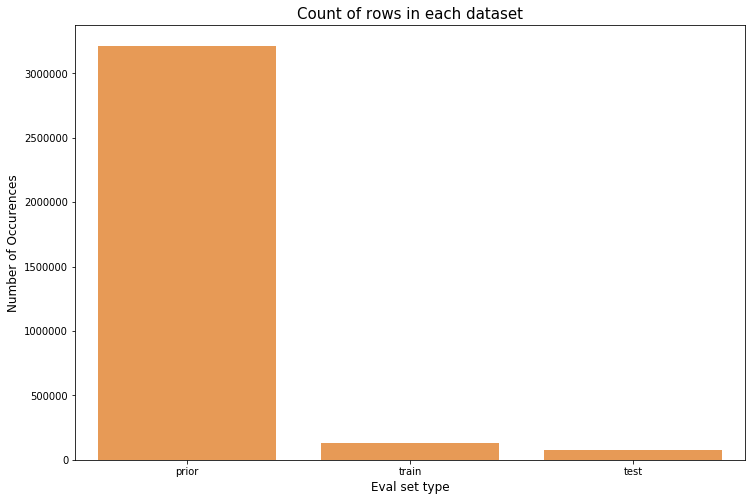

In [0]:
cnt_srs = orders_df.eval_set.value_counts()

plt.figure(figsize=(12,8))
sns.barplot(cnt_srs.index, cnt_srs.values, alpha=0.8, color=color[1])
plt.ylabel('Number of Occurences', fontsize=12)
plt.xlabel('Eval set type', fontsize=12)
plt.title('Count of rows in each dataset', fontsize=15)
plt.show()

In [0]:
def get_unique_count(x):
  return len(np.unique(x))

cnt_srs = order_df.groupby('eval_set')['user_id'].aggregate(get_unique_count)
cnt_srs

eval_set
prior    206209
test      75000
train    131209
Name: user_id, dtype: int64

In [0]:
# percentage of re-orders in prior set # 
order_products_prior_df.reordered.sum() / order_products_prior_df.shape[0]

0.5896974667922161

In [0]:
# percentage of re-orders in the train set # 
order_products_train_df.reordered.sum() / order_products_train_df.shape[0]

0.5985944127509629